# Regression Tutorial

This is a Jupyter notebook. If you open it on mybinder.org, you can play around with it in the browser freely without changing the underlying notebook. If you're already on mybinder.org, try running the code cell below!

In [1]:
print(['Hello World! ']*10)

['Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ', 'Hello World! ']


## Imports

Imports belong at the top of your code. If you add new modules here while coding in a Jupyter notebook, make sure to re-run the cell. 

Aside: It is good practice to periodically "Restart kernel" and "Run all cells" (options at the top). This makes sure your notebook runs fresh from start to finish. Sometimes cells get moved around while you're playing in the notebook and this can cause code in those cells to be run too early or too late. Your notebook should always run from top to bottom so make sure to restart the kernal and run from the beginning often!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Getting data

Often the first thing you want to do is bring data into Python from some data source (text file, database, online link, etc). That usually goes here, but in this case I simulate my own data for this example. For help on importing data into Python, there is a good cheat sheet [here](https://www.datacamp.com/community/blog/importing-data-python-cheat-sheet).

Basically this is where you wrangle your data into "X" and "y" arrays to plot / use for the regression.

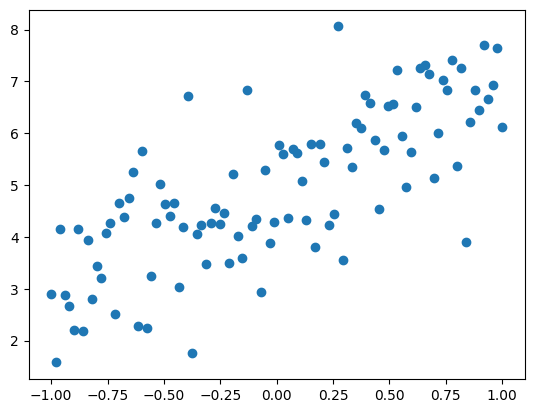

In [3]:
# Simulate a linear relationship y = mx + b
m = 2  # Slope
b = 5  # y-intercept
X = np.linspace(-1, 1, 100)  # X values
y_ideal = m * X + b  # the perfect line, y=m*X+b

# Add some Gaussian noise to simulate random observations
random_seed = np.random.seed(22)  # comment this out to randomize each time
noise = np.random.normal(0, 1, 100)  # Gaussian(mean, stdev, npts)
y = y_ideal + noise

# Visualize the simulated observations
plt.plot(X, y, 'o')

## Data cleaning

Here is where you can play around with plotting the data, cleaning it to remove outliers / null values, etc. This is usually an iterative process that doesn't make it into the final notebook, expect in a few lines that clean or transform the data. These lines usually go right after the data is imported my data so that everything is nicely formatted for the analysis.

## Analysis

Let's break down the regression. Here we use a module called `statsmodels` which has documentation [here](https://www.statsmodels.org/stable/gettingstarted.html). The `statsmodels` modeule is a little overkill for our simple linear regression, but it provides a whole host of output statistics and fitting parameters so we don't have to re-invent the wheel computing each one. See the full `statsmodels` regression documentation [here](https://www.statsmodels.org/stable/regression.html).

Statsmodels contains a function called `.OLS()` for doing Ordinary Least Squares regression. One nuance of how statemodels is set up is that it always requires at least two "models", in our case the "target" linear model, and the "comparison" constant model (also called the "intercept", this is the flat line with no slope). The constant model is the "mean" model, saying that we don't need a sloped line to fit this data, it's just a constant that runs through the sample mean. We can add a constant model with `sm.add_constant()`.

In [5]:
X_ols = sm.add_constant(X)
print(X_ols[:5])

[[ 1.         -1.        ]
 [ 1.         -0.97979798]
 [ 1.         -0.95959596]
 [ 1.         -0.93939394]
 [ 1.         -0.91919192]]


The `sm.add_constant` adds a column of ones to our X data. One way to think about this is to note what happens to our linear equation when we plug in all 1's for X: 

$y = mx + b$

$y = m(1) + b$

$y = c$

So now statsmodels has the input it likes of at least 2 columns, now we have to build the model (input the x and y values to OLS), and then we need to fit the model with `.fit()`.

In [6]:
model = sm.OLS(y, X_ols)  # note y first, then X with 2 columns
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           6.70e-20
Time:                        12:07:01   Log-Likelihood:                -140.32
No. Observations:                 100   AIC:                             284.6
Df Residuals:                      98   BIC:                             289.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9463      0.099     49.745      0.000       4.749       5.144
x1             1.9624      0.171     11.509      0.000       1.624       2.301
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   2.520
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.300
Skew:                          -0.084   Prob(JB):                        0.861
Kurtosis:                       3.208   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This comes with a huge number of statistics, but the most important for linear regression are the R-squared value at the top and the `P>|t|` value for our `x1` model in the middle section.

The R-squared value tells you how much variation in y is explained by X. A value of 0.641 means that 64.1% of the variation in y is explained by X.

In the section that starts with `coef`, we see a number of columns. 

- `coef`: the coefficient ("fit parameter") of each model. The coef for const is the y-intercept ("b" in y=m*x+b), while the coef for x1 is the slope ("m" in y=mx+b).
- 'std err`: the standard error in each coefficient.
- `P>|t|`: the p-value for the t-test for significance of each parameter (if p < 0.05 then the parameter is significant to a 95% confidence level).
- `[0.025 0.975]`: the 95% confidence intervals (if the coef falls into the interval, it is significant to a 95% confidence level).


Since we see that both p-values are < 0.05 and both coefficient fall within the 95% confidence interval, we can say that the linear regression is significant to a 95% conficence level.

We can access all of the values in this table and more directly from the `result` object. You can see a full list of things you can get out by running `dir(result)` or checking out the documentation [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html).

In [7]:
b_coef, m_coef = result.params  # params has the fit coefficients
b_err, m_err = result.bse  # bse has the standard error
print(f'slope: m={m_coef:.3f} +/- {m_err:.3f}')
print(f'intercept: b={b_coef:.3f} +/- {b_err:.3f}')

slope: m=1.962 +/- 0.171
intercept: b=4.946 +/- 0.099


We can also get the R-squared and precise pvalue since it was too small to see in the table above. For regression, you want to check the pvalue of the x1 model which tells you if the "slope" model performs better than the "constant" model (your null hypothesis is "The constant model performs better" and if your p<alpha you reject the null and say "My slope model performs better than the constant model at 1-alpha significance!" Generally we set alpha=0.05, corresponding to 95% confidence). 

Aside: Variables be can quickly inserted into text in a "format-string" or "f-string", (put an f in front of the string like so: `f''`). Variable names in curly braces `{}` will be put into the string at that position. If that variable contains a number, you can include short format codes so that it doesn't print a million decimal points. The float formatter `f` rounds to the number of decimals (e.g. `:.3f` rounds to 3 places). The scientific notation formatter `e` takes the number of significant places and displays the number in scientific notation (e.g. `:.2e` will print a number of form 0.12e3).

In [8]:
print(f'Regression R-squared: R^2 = {result.rsquared:.3f}')
print(f'Regression p-value: p(>|t|) = {result.pvalues[1]:.2e}')

Regression R-squared: R^2 = 0.575
Regression p-value: p(>|t|) = 6.70e-20


Our p-value is < 0.05, so we can reject the null at 95% significance and say we do indeed have a line rather than a uncorrelated cluster of points. You can go back to the top, crank up the Gaussian noise and re-run the notebook until the p-value is no longer significant! Note how this also changes the R-squared value in the table above.

## Plotting results

Here is where you can easily spend the majority of your time: making things pretty. This [Medium article](https://towardsdatascience.com/an-introduction-to-making-scientific-publication-plots-with-python-ea19dfa7f51e) is a nice guide to ploting publication quality figures in matplotlib.

One thing to make Python plots look more consistent and properly formatted off the bat is to use the `rcParams` feature which allows you to change the global settings of all your plots in one convenient place (see [this link](https://matplotlib.org/tutorials/introductory/customizing.html) for an exhaustive list of tunable plot params). You can also choose a style which sets a bunch of these parameters for you by default. You can find a good summary of styles [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html). Below we use `seaborn-paper`.

One last note on plotting is if you know the dimensions you need your figure to be, set that explicitly with "figsize" first, that way you can adjust the point / font sizes accordingly and have the final figure be scaled correctly in your manuscript / presentation, etc.

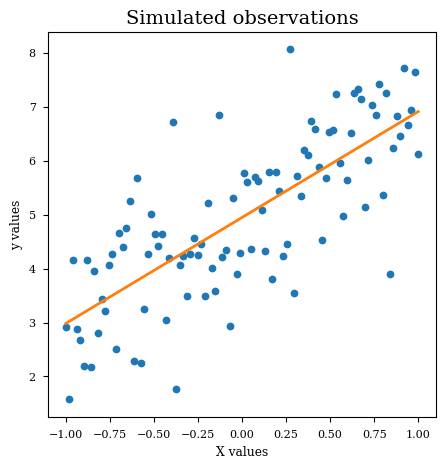

In [9]:
plt.style.use('seaborn-paper')
plt.rcParams.update({
    'figure.figsize': (5, 5),  # Set figsize in inches
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2
})

# You have 3 options for plotting: quick, on a figure, on a set of axes
# These are mostly interchangeable but each gives you more control than the last

# Quick:
# plt.plot(X, y)

# On a figure object:
# f = plt.figure()
# f.plot(X, y)

# On axes:
# f, ax = plt.subplots()
# ax.plot(X, y)

# Since I often want subplots, I default to the last one for all plotting
f, ax = plt.subplots()
ax.set_title('Simulated observations')
ax.set_xlabel('X values')
ax.set_ylabel('y values')

# Let's plot the original data points and the regression line
ax.plot(X, y, 'o')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-')


We can also get prediction and confidence intervals from our OLS result from `statsmodels`. We first have to run `result.get_prediction()` and then choose an alpha significance level to make the intervals (confidence is 1-alpha, so alpha=0.05 corresponds to 95% confidence).

The `predictions.conf_int()` method results 2 columns, the lower and upper confidence or prediction (set `obs=True` / `obs=False` respectively). As a quick one liner, we can do `predictions.conf_int().T` to take the transpose and save the two rows to two variables for the lower and upper array of the interval. Here we get the 95% confidence and prediction intervals and plot them on the same plot from above.

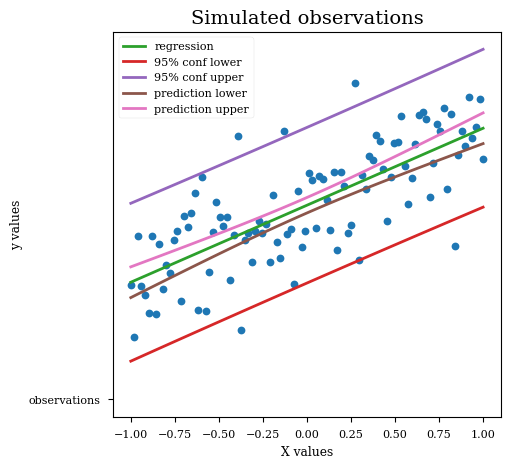

In [10]:
predictions = result.get_prediction()
conf_low, conf_upp = predictions.conf_int(alpha=0.05, obs=True).T
pred_low, pred_upp = predictions.conf_int(alpha=0.05, obs=False).T

# Plot setup
f, ax = plt.subplots()
ax.set_title('Simulated observations')
ax.set_xlabel('X values')
ax.set_ylabel('y values')

# Plot the data
ax.plot(X, y, 'o', 'observations')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-', label='regression')

# Plot the intervals
ax.plot(X, conf_low, label='95% conf lower')
ax.plot(X, conf_upp, label='95% conf upper')
ax.plot(X, pred_low, label='prediction lower')
ax.plot(X, pred_upp, label='prediction upper')
ax.legend() # legend gets populated with the labels of each .plot() call

It's usually clear enough to plot the prediction and confidence intervals with the same style and not label each individually. We can do that like by specifying the same linestyle and color for each and only labelling one of the pair of lines for each interval.

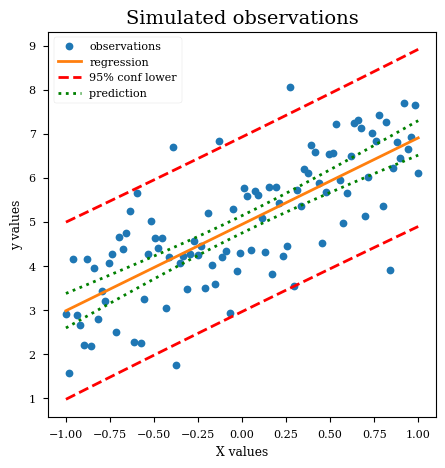

In [11]:
predictions = result.get_prediction()
conf_low, conf_upp = predictions.conf_int(alpha=0.05, obs=True).T
pred_low, pred_upp = predictions.conf_int(alpha=0.05, obs=False).T

# Plot setup
f, ax = plt.subplots()
ax.set_title('Simulated observations')
ax.set_xlabel('X values')
ax.set_ylabel('y values')

# Plot the data
ax.plot(X, y, 'o', label='observations')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-', label='regression')

# Plot the intervals
ax.plot(X, conf_low, '--', color='red', label='95% conf lower')
ax.plot(X, conf_upp, '--', color='red')
ax.plot(X, pred_low, ':', color='green', label='prediction ')
ax.plot(X, pred_upp, ':', color='green')
ax.legend()

## Putting it all together

Here's all the copy/pastable code. Feel free to play around with the different parameters!

Regression slope: m = 1.962 +/- 0.171
Regression intercept: b = 4.946 +/- 0.099
Regression R-squared: R^2 = 0.575
Regression p-value: p(>|t|) = 6.70e-20


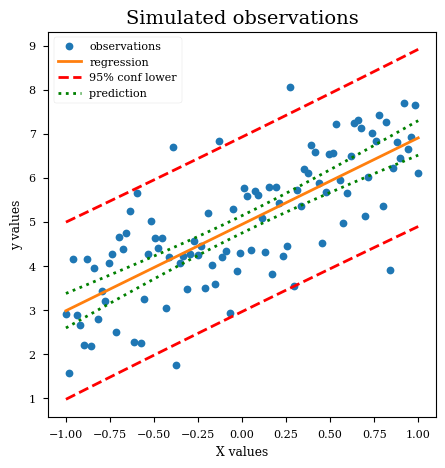

In [12]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulated linear data
b = 5
X = np.linspace(-1, 1, 100)
y_ideal = m * X + b
random_seed = np.random.seed(22)  
noise = np.random.normal(0, 1, 100)
y = y_ideal + noise

# Regression
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols)
result = model.fit()
# result.summary()  # get tabulated regression results
b_coef, m_coef = result.params
b_err, m_err = result.bse
print(f'Regression slope: m = {m_coef:.3f} +/- {m_err:.3f}')
print(f'Regression intercept: b = {b_coef:.3f} +/- {b_err:.3f}')
print(f'Regression R-squared: R^2 = {result.rsquared:.3f}')
print(f'Regression p-value: p(>|t|) = {result.pvalues[1]:.2e}')

# Plot setup
plt.style.use('seaborn-paper')
plt.rcParams.update({
    'figure.figsize': (5, 5),  # Set figsize in inches
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2
})
predictions = result.get_prediction()
conf_low, conf_upp = predictions.conf_int(alpha=0.05, obs=True).T
pred_low, pred_upp = predictions.conf_int(alpha=0.05, obs=False).T

# Init plot and label axes
f, ax = plt.subplots()
ax.set_title('Simulated observations')
ax.set_xlabel('X values')
ax.set_ylabel('y values')

# Plot the data
ax.plot(X, y, 'o', label='observations')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-', label='regression')

# Plot the intervals
ax.plot(X, conf_low, '--', color='red', label='95% conf lower')
ax.plot(X, conf_upp, '--', color='red')
ax.plot(X, pred_low, ':', color='green', label='prediction ')
ax.plot(X, pred_upp, ':', color='green')
ax.legend()

## Final thoughts

This is everything you need to get linear regression going in Python. The hard part not shown here is wrangling the data into a format to drop into this framework. Often your data has null values to remove, or perhaps you need to transform it to be linear first before running the regression. For example, if you're fitting a power law (which is linear on log-log plots), you first need to take the logarithm of your x and y arrays, take the linear regression of those arrays, and finally convert the regression parameters back to linear space. In that case you also want to plot your data on log axes.

As always, Google & StackOverflow are your friends! A lot of data scientists have been switching to Python recently, so there is a rich and active community - and many forums full of questions - dedicated to doing statistics in Python.